

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural - Proyecto Final 






# Que Dicen la Canciones 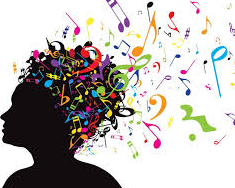





# Librerias

In [1]:
#Librerías básicas utiliadas
import xlrd
import re
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint

#Librerías necesarias para la limpieza de datos
import string
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import gensim.models.word2vec as w2v
from wordcloud import WordCloud
from IPython.display import display
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

#Librerías necesarias para abrir imágenes, generar nube de palabras y plot
import PIL.Image
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from IPython.display import display

#librerias para Graficar el modelo

from sklearn.decomposition import PCA #analisis de componente principal, reducir el número de dimensiones para visualizar mejor
#cargar librerias visualización
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Sobre los Datos

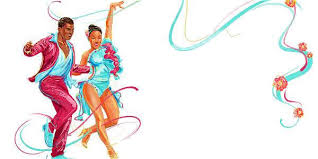


## Las canciones fuerón recolectadas de diferentes fuentes se eligio el genero "Salsa"


In [2]:
# Cargar Datos

xls = pd.ExcelFile("C:/Users/practicas/Desktop/Archivo_canciones.xlsx")
print (xls.sheet_names)
texto=xls.parse('Hoja1')
texto.head()

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.



['Hoja1']


NOMBRE DE LA CANCION                AÑO  \
0       Y no hago mas na  Sin informacion   
1                 Señora             2014   
2         ¿Juego O Amor?             1993   
3             Describela  Sin informacion   
4       Cambiaré por tí'             2005   

                                               LETRA  \
0  Yo me levanto por la mañana,\nme doy un baño y...   
1  Señora, te llaman señora\nTodos te respetan si...   
2  Estoy pensando en lo que me has dicho\nY es lo...   
3  Eso dicen los astros.\nElzodiaco me ha dicho\n...   
4  Yo Que He Sido Un Seductor\nImplacable Cazador...   

                                       COMPOCITOR       CANTANTE  
0                     José Juan 'Chiquitín' García   Gran Combo   
1                                  Rafael de Jérez        Otros   
2                                         Adam Sez  Marc Anthony  
3                                   Alberto Barros        Otros   
4                                    Alexis Lozano        Otros

In [3]:
# Alimentar lista de stopwords
type(stopwords_sp)
stopwords_sp.extend(["si","alabalabala","la", "alala", "me", "tu", "si", "coro","bis", "x", "i" "q"])
print(stopwords_sp)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [4]:
#preprocesado
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto.split()

texto['PP'] = texto['LETRA'].apply(lambda texto: pre_procesado(texto))
texto.head()

NOMBRE DE LA CANCION                AÑO  \
0       Y no hago mas na  Sin informacion   
1                 Señora             2014   
2         ¿Juego O Amor?             1993   
3             Describela  Sin informacion   
4       Cambiaré por tí'             2005   

                                               LETRA  \
0  Yo me levanto por la mañana,\nme doy un baño y...   
1  Señora, te llaman señora\nTodos te respetan si...   
2  Estoy pensando en lo que me has dicho\nY es lo...   
3  Eso dicen los astros.\nElzodiaco me ha dicho\n...   
4  Yo Que He Sido Un Seductor\nImplacable Cazador...   

                                       COMPOCITOR       CANTANTE  \
0                     José Juan 'Chiquitín' García   Gran Combo    
1                                  Rafael de Jérez        Otros    
2                                         Adam Sez  Marc Anthony   
3                                   Alberto Barros        Otros    
4                                    Alexis Lozano        Otros    

                                                  PP  
0  [levanto, mañana, doy, baño, perfumo, buen, de...  
1  [señora, llaman, señora, respetan, ver, verdad...  
2  [pensando, dicho, duele, dentro, corazon, quie...  
3  [dicen, astros, elzodiaco, dicho, voy, encontr...  
4  [sido, seductor, implacable, cazador, palabras...

In [5]:
# Representación de los documentos en forma de diccionario
dictionary = Dictionary(texto['PP'].values)

# Filtrar palabras muy frecuentes o infrecuentes
dictionary.filter_extremes(no_below=5, no_above=0.5) 

corpus = [dictionary.doc2bow(text) for text in texto['PP'].values]

# Train the topic model 
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=100)  # num_topics=2: Numero de temas 

In [6]:
#resultados
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

# Uso de el Modelo Word2vec - Capturan similitudes distributivas entre palabras.

In [7]:
# Se ejecuta el modelo word2vec con la columna pre-procesado de nuestro DataFrame

modelo = w2v.Word2Vec(texto['PP'].values,
                         sg=0,        # Skip_gram o bolsa palabras
                         seed=1,      # Semilla
                         size=25,     # Numero dimensiones 
                         min_count=4, # Numero de minimo que aparece cada palabra
                         window=2)    # ventana contextual de cada palabra

In [8]:
modelo.wv.vocab

{'levanto': <gensim.models.keyedvectors.Vocab at 0x203a893fd90>,
 'mañana': <gensim.models.keyedvectors.Vocab at 0x203a89b60d0>,
 'doy': <gensim.models.keyedvectors.Vocab at 0x203a89b61f0>,
 'buen': <gensim.models.keyedvectors.Vocab at 0x203aa2ec550>,
 'hago': <gensim.models.keyedvectors.Vocab at 0x203aa2ec2b0>,
 'na': <gensim.models.keyedvectors.Vocab at 0x203aa2ec670>,
 'después': <gensim.models.keyedvectors.Vocab at 0x203aa2ec8b0>,
 'leo': <gensim.models.keyedvectors.Vocab at 0x203aa2ecfd0>,
 'pongo': <gensim.models.keyedvectors.Vocab at 0x203aa2ec190>,
 'ver': <gensim.models.keyedvectors.Vocab at 0x203aa2eca90>,
 'hora': <gensim.models.keyedvectors.Vocab at 0x203aa2ec130>,
 'doce': <gensim.models.keyedvectors.Vocab at 0x203aa2ec070>,
 'arroz': <gensim.models.keyedvectors.Vocab at 0x203aa2ec430>,
 'habichuelas': <gensim.models.keyedvectors.Vocab at 0x203aa2ecd90>,
 'carne': <gensim.models.keyedvectors.Vocab at 0x203aa2ec370>,
 'voy': <gensim.models.keyedvectors.Vocab at 0x203aa2ff73

In [9]:
# Con cuantas palabras tiene el modelo
len(modelo.wv.vocab)

3704

# Palabras Similares

In [10]:
#Se valida el modelo 
modelo.wv.most_similar("caramba")

[('pensaste', 0.9923301935195923),
 ('hacerte', 0.9916326999664307),
 ('vendo', 0.9915062785148621),
 ('sigamos', 0.9912858009338379),
 ('psiquiatría', 0.9912058115005493),
 ('huarachar', 0.9911831617355347),
 ('rumbo', 0.9908673763275146),
 ('daria', 0.9907422065734863),
 ('ódiame', 0.9905984401702881),
 ('razones', 0.9904527068138123)]

In [11]:
modelo.wv.most_similar("nadie")

[('quise', 0.9995173215866089),
 ('mil', 0.9994573593139648),
 ('sabe', 0.9994469881057739),
 ('dentro', 0.9994169473648071),
 ('bailar', 0.9993922114372253),
 ('forma', 0.9993841052055359),
 ('i', 0.9993630647659302),
 ('negra', 0.9993518590927124),
 ('morir', 0.9993378520011902),
 ('todas', 0.9993011355400085)]

In [12]:
modelo.wv.most_similar("ternura")

[('brazos', 0.9995932579040527),
 ('veces', 0.9995273947715759),
 ('tiempo', 0.9994325041770935),
 ('necesito', 0.9994324445724487),
 ('vengo', 0.9994282722473145),
 ('sepa', 0.9993696808815002),
 ('esperando', 0.9993639588356018),
 ('cielo', 0.9993554353713989),
 ('cosa', 0.9993484020233154),
 ('momento', 0.9993424415588379)]

In [13]:
#palabras que se vizualizan en el vocabulario
vocab = [e[0] for e in modelo.wv.most_similar("señora")]+[e[0] for e in modelo.wv.most_similar("ternura")]
print(vocab)

['todas', 'voz', 'campo', 'hombre', 'favor', 'cómo', 'vuelta', 'canción', 'seguir', 'quiera', 'brazos', 'veces', 'tiempo', 'necesito', 'vengo', 'sepa', 'esperando', 'cielo', 'cosa', 'momento']


In [14]:
# Representacion Matrix

X = modelo[modelo.wv.vocab]
matrix = pd.DataFrame(X)
matrix.index = modelo.wv.vocab.keys()

matrix


<ipython-input-14-f4499a4df6f9>:3: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



0         1         2         3         4         5   \
levanto    0.033955 -0.035036  0.031804 -0.045731 -0.017298 -0.001046   
mañana     0.380335 -0.638540  0.172779 -0.489869 -0.433686 -0.126841   
doy        0.210765 -0.357686  0.119532 -0.279545 -0.280782 -0.055028   
buen       0.144476 -0.253863  0.091576 -0.202978 -0.190309 -0.042012   
hago       0.232162 -0.379959  0.124437 -0.319313 -0.250979 -0.081624   
...             ...       ...       ...       ...       ...       ...   
realizado  0.025402 -0.018735  0.002229 -0.021428 -0.041116 -0.016306   
tiquita    0.038336 -0.034776  0.004972 -0.055408 -0.034571 -0.014508   
dámela     0.047379 -0.061613  0.019114 -0.034872 -0.051670  0.002140   
pidiera    0.033434 -0.056739  0.038896 -0.065746 -0.033900 -0.009582   
frias      0.019212 -0.026133  0.015911 -0.047636 -0.022135  0.007391   

                 6         7         8         9   ...        15        16  \
levanto   -0.023799 -0.014422  0.040083  0.014231  ...  0.085896  0.037405   
mañana    -0.492204 -0.525274  0.993444  0.411792  ...  1.168007  0.753938   
doy       -0.333515 -0.324258  0.638985  0.228570  ...  0.713017  0.480129   
buen      -0.218936 -0.210451  0.470003  0.156259  ...  0.477448  0.339277   
hago      -0.290577 -0.290356  0.635804  0.208528  ...  0.734180  0.458509   
...             ...       ...       ...       ...  ...       ...       ...   
realizado -0.031660 -0.036855  0.069189  0.032135  ...  0.047261  0.030108   
tiquita   -0.056915 -0.045047  0.101994  0.021231  ...  0.112051  0.079558   
dámela    -0.064263 -0.051827  0.109670  0.025841  ...  0.094362  0.089087   
pidiera   -0.059840 -0.050322  0.121886  0.037948  ...  0.130197  0.082009   
frias     -0.025365 -0.041006  0.088991  0.021659  ...  0.099151  0.051652   

                 17        18        19        20        21        22  \
levanto    0.024714 -0.020505  0.060508  0.058229  0.024572 -0.043831   
mañana     0.253383 -0.420167  0.976438  0.616529  0.285365 -0.640042   
doy        0.167464 -0.234424  0.656517  0.435896  0.172367 -0.388050   
buen       0.111120 -0.160936  0.439173  0.288043  0.110667 -0.258144   
hago       0.164840 -0.224184  0.624440  0.435468  0.176720 -0.343555   
...             ...       ...       ...       ...       ...       ...   
realizado  0.008947 -0.038742  0.038303  0.036408  0.022831 -0.042844   
tiquita    0.033387 -0.043795  0.102341  0.075979  0.003631 -0.057385   
dámela     0.016925 -0.018790  0.100535  0.071515  0.011490 -0.048207   
pidiera    0.038766 -0.055975  0.101173  0.062198  0.031030 -0.074311   
frias      0.023762 -0.021425  0.087381  0.056603  0.032247 -0.052401   

                 23        24  
levanto    0.026501  0.061337  
mañana     0.401048  1.296668  
doy        0.284114  0.808744  
buen       0.224718  0.581487  
hago       0.274827  0.786144  
...             ...       ...  
realizado  0.019027  0.080777  
tiquita    0.039662  0.102327  
dámela     0.041894  0.119697  
pidiera    0.037493  0.144221  
frias      0.050476  0.093543  

[3704 rows x 25 columns]

In [15]:
matrix.shape # 3704 filas - 25 dimendiones 

(3704, 25)

In [16]:
#Se realiza el grafico del modelo con todas las palabras

pca = PCA(n_components=2)

result = pca.fit_transform(matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['Palabra'] = matrix.index.values

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['Palabra'].values,
                   mode='markers') 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [17]:
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

# Bolsa de palabras

In [18]:
salsa = PIL.Image.open("C:/Users/practicas/Desktop/Salsa.png")

In [19]:
# Pasar la imagen a nuemero como la lee el computador
mask = np.array(salsa)

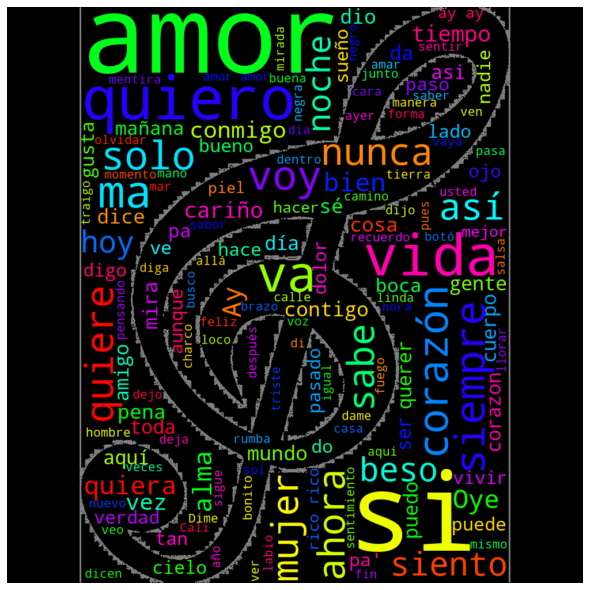

In [20]:
palabras = texto.LETRA.str.cat(sep=" ")
 
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=900, max_words=150,
                     background_color='black', colormap='hsv',
                     stopwords=stopwords,
                     mask=mask, contour_width=2, contour_color='grey').generate(palabras) # controno de mascara

plt.figure(figsize=(10,8)) #tamaño mascara
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [21]:
# Reemplazamos los años faltantes por el año mas comun = mediana
dataset = texto.rename(columns={'AÑO': 'YEAR', 'COMPOCITOR ': 'COMPOSITOR'})
dataset = dataset.replace('Sin informacion', np.NaN, regex=True)
dataset = dataset.replace('NO HAY', np.NaN, regex=True)
dataset['YEAR'].fillna(dataset['YEAR'].median(), inplace=True)

In [22]:
# Se convierte la variable year en un entero sin decimales.
dataset["YEAR"] = dataset["YEAR"].astype(int)

In [23]:
# Filtramos solo 2 columnas que se necesitan para la grafica
datasetfiltered = dataset.filter(["NOMBRE DE LA CANCION  ", "YEAR"])
datasetfiltered

NOMBRE DE LA CANCION    YEAR
0         Y no hago mas na  1991
1                   Señora  2014
2           ¿Juego O Amor?  1993
3               Describela  1991
4         Cambiaré por tí'  2005
..                     ...   ...
710        Lo Que Te Sobre  2002
711              Tan Buena  2002
712      Blanca y Azucena'  2016
713         Cambio de Piel  2013
714             Te Extraño  1994

[715 rows x 2 columns]

In [24]:
# Se cuentan por año la cantidad de canciones unicas, incluyendo NAs
data_counts = datasetfiltered.groupby(['YEAR']).count()
data_counts

NOMBRE DE LA CANCION  
YEAR                        
1920                       1
1936                       1
1949                       1
1950                       2
1951                       2
...                      ...
2015                       6
2016                       7
2017                       3
2018                       9
2019                       5

[67 rows x 1 columns]

In [25]:
# Renombramos la nueva columna con los conteos
final_dataset = data_counts.rename(columns={'NOMBRE DE LA CANCION  ': 'count_songs'})
final_dataset

count_songs
YEAR             
1920            1
1936            1
1949            1
1950            2
1951            2
...           ...
2015            6
2016            7
2017            3
2018            9
2019            5

[67 rows x 1 columns]

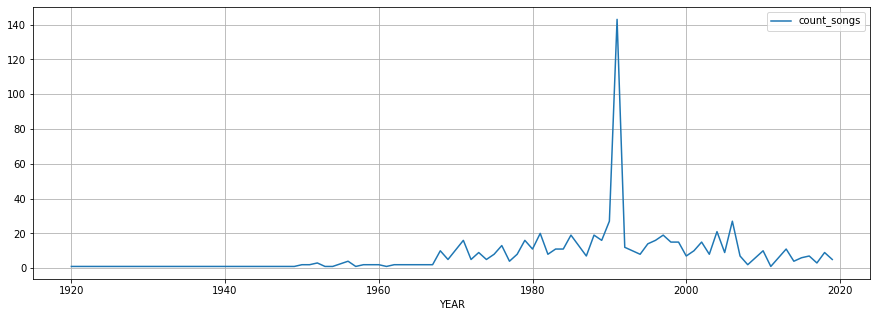

In [26]:
# Compositores de canciones publicadas por año - Cantantes liena de tiempo años
final_dataset.plot(grid=True, figsize=(15,5))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 9 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 9 missing from current font.



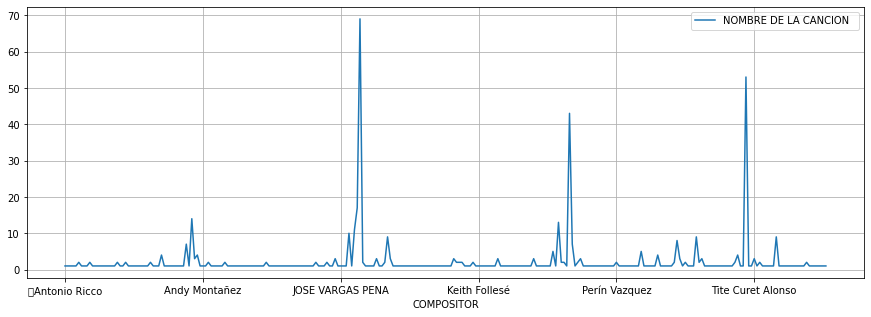

In [27]:
# Filtramos solo 2 columnas que se necesitan para la grafica
datasetfiltered_compositores = dataset.filter(["NOMBRE DE LA CANCION  ", "COMPOSITOR"])
# Se cuentan por COMPOSITOR la cantidad de canciones unicas, incluyendo NAs
data_counts_compositores = datasetfiltered_compositores.groupby(['COMPOSITOR']).count()
# Renombramos la nueva columna con los conteos
final_dataset_compositores = data_counts_compositores.rename(columns={'COMPOSITOR': 'count_composiciones'})
# Cantidad de canciones publicadas por Compositor
final_dataset_compositores.plot(grid=True, figsize=(15,5), label='NUM. CANCIONES POR COMPOSITOR')